## Confusion Matrix 

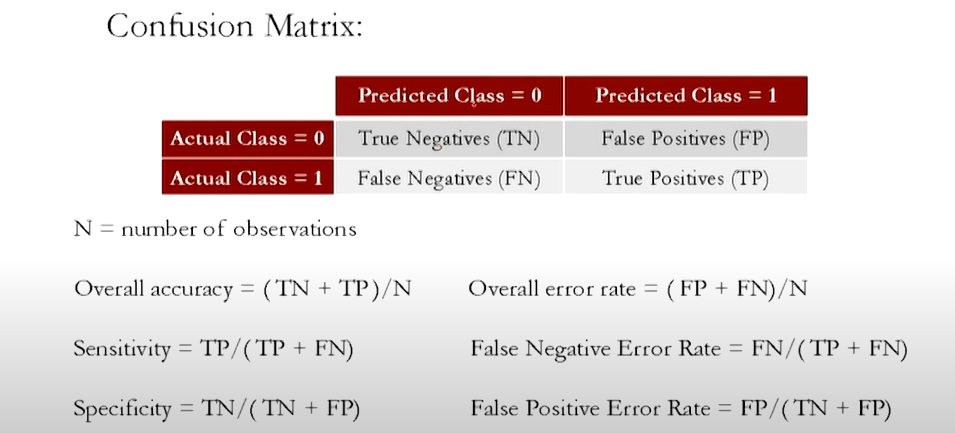


## 1. Simmons
**Ques**

- Let us consider an application of logistic regression involving a direct mail promotion being used by Simmons Stores.
- Simmons owns and operates a national chain of women’s apparel stores.
- Five thousand copies of an expensive four-color sales catalog have been printed, and each catalog includes a coupon that provides a `$50` discount on purchases of `$200` or more.
-  The catalogs are expensive and Simmons would like to send them to only those customers who have the highest probability of using the coupon.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('datasets/5_Simmons.xls')
data.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [52]:
data.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [53]:
data['Coupon'].unique()

array([0, 1], dtype=int64)

In [54]:
data['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In [55]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [56]:
x = data[['Card','Spending']]
y = data['Coupon'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [57]:
    Lreg = LogisticRegression(solver = 'lbfgs')
    Lreg.fit(x_train, y_train.ravel())

LogisticRegression()

In [58]:
y_predict = Lreg.predict(x_test)

y_predict_train = Lreg.predict(x_train)

y_prob_train = Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [59]:
y_prob = Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)
y_prob

array([0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
       0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
       0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
       0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
       0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435])

In [60]:
x = data[['Card','Spending']]
y = data['Coupon']

import statsmodels.api as sm
x1 = sm.add_constant(x)
logit_model = sm.Logit(y,x1)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Apr 2022   Pseudo R-squ.:                  0.1012
Time:                        10:59:09   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.

In [61]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_predict)
score

0.76

In [62]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test,y_predict)

array([[15,  1],
       [ 5,  4]], dtype=int64)

In [63]:
tn,fp,fn,tp = confusion_matrix(y_test, y_predict).ravel()

print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  15
False Positives:  1
False Negatives:  5
True Positives:  4


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [65]:
Accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}".format(Accuracy))

Accuracy 0.76


In [66]:
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.94


In [67]:
Sensitivity = tp/(tp+fn)
print("Sensitivity {:0.2f}".format(Sensitivity
                                  ))

Sensitivity 0.44


In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
log_ROC_AUC1 = roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,thresholds1 = roc_curve(y_train,y_prob_train)
roc_auc1 = auc(fpr1,tpr1)

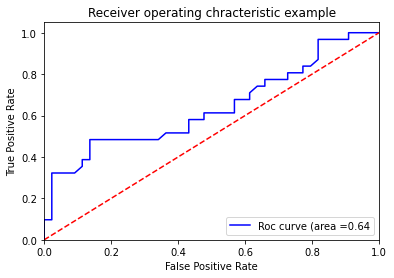

In [69]:
plt.figure()
plt.plot(fpr1,tpr1,color = 'blue',label='Roc curve (area =%0.2f' % roc_auc1)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating chracteristic example')
plt.legend(loc = "lower right")
plt.show()

#### Acuuracy checking for different threshold values

In [70]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob.reshape(1,-1),0.35)[0]
y_predict_class1

C:\Users\amilk\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.35 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [71]:
y_predict_class1 = y_predict_class1.astype(int)
y_predict_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [72]:
confusion_matrix_2 = confusion_matrix(y_test, y_predict_class1)
print(confusion_matrix_2)

[[8 8]
 [0 9]]


#### Calculating Optimal Threshold Value

In [73]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(fpr,tpr)

print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.902778


In [74]:
import numpy as np
i  = np.arange(len(tpr))
roc = pd.DataFrame({'fpr' : pd.Series(fpr,index = i),'tpr' : pd.Series(tpr,index = i),
                   '1-fpr' : pd.Series(1-fpr, index = i),'tf' : pd.Series(tpr-(1-fpr), index = i),
                   'thresholds' : pd.Series(thresholds, index = i)})

roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.457033


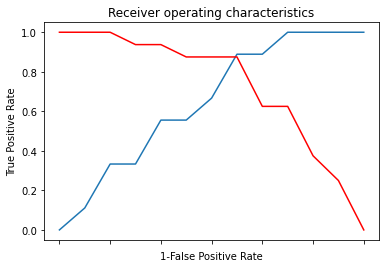

In [75]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
ax.set_xticklabels([])
plt.show()

In [76]:
from sklearn.preprocessing import binarize
y_predict_class4 = binarize(y_prob.reshape(1,-1),0.45)[0]
y_predict_class4

C:\Users\amilk\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.45 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [77]:
confusion_matrix_5= confusion_matrix(y_test, y_predict_class4)
print(confusion_matrix_5)

[[14  2]
 [ 1  8]]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25



## 2. Reynolds
### Regression Analysis Model Building 
**Ques**
- To illustrate, let us consider the problem facing Reynolds, Inc., a manufacturer of industrial scales and laboratory equipment.
- Managers at Reynolds want to investigate the relationship between length of employment of their salespeople and the number of electronic laboratory scales sold.
-  Table in the next slide gives the number of scales sold by 15 randomly selected salespeople for the most recent sales period and the number of months each salesperson has been employed by the firm.

In [79]:
tbl1 = pd.read_excel('datasets/6_Reynolds.xlsx')
tbl1

,ScalesSold,MonthsEmployed
0,275,41
1,296,106
2,317,76
3,376,104
4,162,22
5,150,12
6,367,85
7,308,111
8,189,40
9,235,51


Text(0.5, 0, 'Months Emplyed')

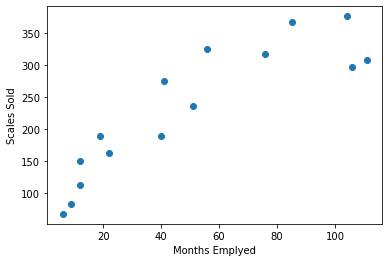

In [80]:
plt.scatter(tbl1['MonthsEmployed'],tbl1['ScalesSold'])
plt.ylabel('Scales Sold')
plt.xlabel('Months Emplyed')

In [81]:
x = tbl1['MonthsEmployed']
y = tbl1['ScalesSold']
x2 = sm.add_constant(x)
model = sm.OLS(y,x2)
Model = model.fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           1.24e-05
Time:                        10:59:12   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.2279     21.628      5.

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [82]:
E = Model.resid_pearson
E

array([ 1.33945744, -1.35645713,  0.50765989,  0.35518943, -0.03063607,
        0.20702037,  1.08543558, -1.35411191, -0.34936157,  0.05163116,
       -1.00208207, -0.56041143, -1.18121025,  1.62923113,  0.65864542])

In [83]:
yhat = Model.predict(x2)
yhat

0     208.675693
1     363.166061
2     291.862814
3     358.412511
4     163.516970
5     139.749221
6     313.253788
7     375.049935
8     206.298918
9     232.443442
10    132.618896
11    139.749221
12    125.488571
13    244.327316
14    156.386645
dtype: float64

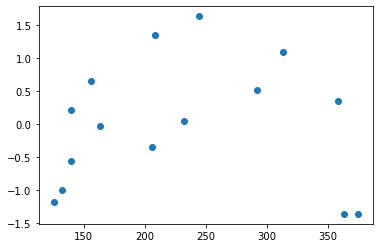

In [84]:
plt.scatter(yhat,E)

In [85]:
X_sq = x**2

x_new = np.column_stack((x,X_sq))
x_new2 =  sm.add_constant(x_new)
model2 = sm.OLS(y,x_new2)
Model2 = model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           8.75e-07
Time:                        10:59:13   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3476     22.775      1.991      0.0

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


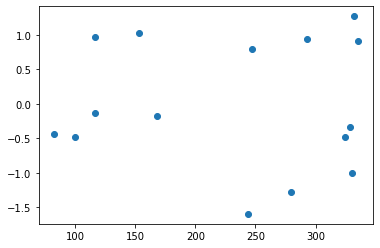

In [86]:
E2 = Model2.resid_pearson
yhat2 = Model2.predict(x_new2)

plt.scatter(yhat2,E2)

## 3. Tyler
**Ques**

- A company introduces a new shampoo product.
- Two factors believed to have the most influence on sales are unit selling price and advertising expenditure.
- To investigate the effects of these two variables on sales, prices of `$2.00`, `$2.50`, and `$3.00` were paired with advertising expenditures of `$50,000` and `$100,000` in 24 test markets.

In [87]:
tbl1= pd.read_excel('datasets/7_Tyler.xlsx')
tbl1.head()

,Price,AdvertisingExpenditure($1000s),Sales(1000s)
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358


Text(0.5, 0, 'x1')

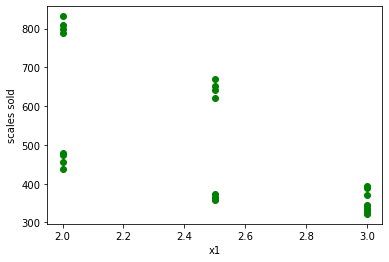

In [95]:
plt.scatter(tbl1['Price'], tbl1['Sales(1000s)'], color = 'green')
plt.ylabel('scales sold')
plt.xlabel('x1')

Text(0.5, 0, 'x2')

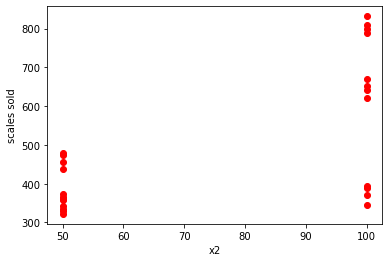

In [96]:
plt.scatter(tbl1['AdvertisingExpenditure($1000s)'], tbl1['Sales(1000s)'], color = 'red')
plt.ylabel('scales sold')
plt.xlabel('x2')

In [97]:
z1 = tbl1['AdvertisingExpenditure($1000s)']
z2 = tbl1['Price']
z3 = z1*z2

In [98]:
x_new = np.column_stack((z1,z2,z3))
y = tbl1['Sales(1000s)']

xnew2 = sm.add_constant(x_new)
model2 = sm.OLS(y,xnew2)
Model2 = model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:           Sales(1000s)   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     297.9
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           9.26e-17
Time:                        11:08:42   Log-Likelihood:                -111.99
No. Observations:                  24   AIC:                             232.0
Df Residuals:                      20   BIC:                             236.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.8333    112.842     -2.444      0.0

## 4. MPG
**Ques**

In [106]:
tbl2 = pd.read_excel('datasets/8_MPG.xlsx')
tbl2.head()

,MilesperGallon,Weight
0,28.7,2289
1,29.2,2113
2,34.2,2180
3,27.9,2448
4,33.3,2026


Text(0.5, 0, 'Weight')

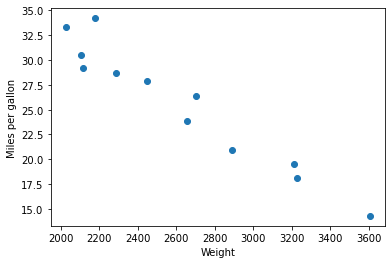

In [108]:
plt.scatter(tbl2['Weight'],tbl2['MilesperGallon'])
plt.ylabel('Miles per gallon')
plt.xlabel('Weight')

In [109]:
x = tbl2['Weight']
y = tbl2['MilesperGallon']
x2 = sm.add_constant(x)
model = sm.OLS(y,x2)
Model = model.fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:         MilesperGallon   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           2.85e-07
Time:                        12:21:18   Log-Likelihood:                -22.091
No. Observations:                  12   AIC:                             48.18
Df Residuals:                      10   BIC:                             49.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0957      2.582     21.725      0.0

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [110]:
E = Model.resid_pearson
print(E)

yhat = Model.predict(x2)
yhat

[-0.44511273 -1.37252481  2.08753315  0.18422536  0.47540179  1.05668329
 -0.75350063 -0.64311699 -0.25953343  0.4879158   0.12130227 -0.93927307]


0     29.443573
1     31.492839
2     30.712721
3     27.592247
4     32.505829
5     24.634783
6     25.158743
7     31.574344
8     18.533557
9     18.684924
10    14.097361
11    22.469081
dtype: float64

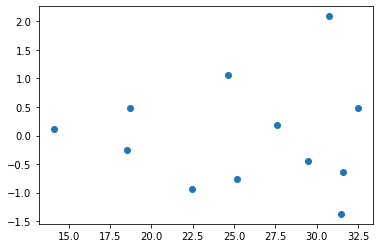

In [111]:
plt.scatter(yhat,E)

In [116]:
Y = np.log(y)

model2 = sm.OLS(Y,x2)
Model2 = model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:         MilesperGallon   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           9.84e-08
Time:                        12:26:14   Log-Likelihood:                 17.005
No. Observations:                  12   AIC:                            -30.01
Df Residuals:                      10   BIC:                            -29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5242      0.099     45.553      0.0

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
